Ejercicio 1

Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{10×10}$ definidas positivas y diagonales,
elaborar una serie de tests tales que muestren las dificultades del Método del Gradiente con longitud de paso óptima a medida que aumenta el orden de diferencia entre el menor y el mayor autovalor. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración, comparar en cada caso con los resultados obtenidos
tomando:
- $\frac{3}{4}t^*_k$
- $\frac{1}{2}t^*_k$
- $\frac{1}{4}t^*_k$
- $\gamma _k t^*_k$ con $\gamma_k$ un numero aleatorio en (0,1].


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x,A):
    return 0.5*np.dot(x.T,A@x)

In [3]:
def metodo_gradiente_paso_optimo(A,x0,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t_optimo=np.dot(d.T,d)/np.dot(d.T,A@d)
        x_k=x_k+t_optimo*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y

def metodo_gradiente_no_optimo(A,x0,alpha,max_iter=1000):
    k=0
    x_k=x0
    d=-A@x0
    y=[]
    while(k<max_iter and np.linalg.norm(d)>10**-8):
        t=alpha*(np.dot(d.T,d)/np.dot(d.T,A@d))
        x_k=x_k+t*d
        d=-A@x_k
        y.append(f(x_k,A))
        k+=1
    return y

Primero vemos como varia la convergencia del metodo al aumentar la diferencia entre los autovalores de la matriz $A$.

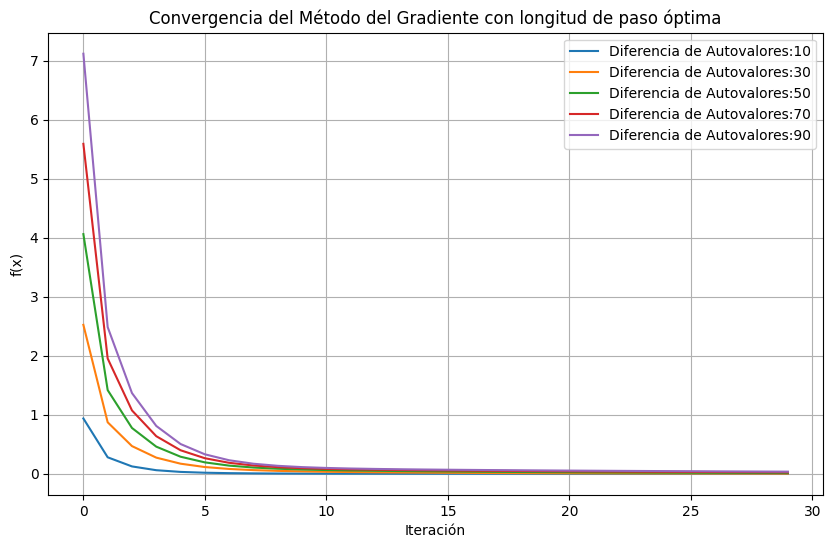

In [4]:
ratios=np.arange(10,100,20)
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for ratio in ratios:
    autovalores=np.linspace(1,ratio,10)
    A=np.diag(autovalores)
    y=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    plt.plot(y,label=f"Diferencia de Autovalores:{ratio}")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con longitud de paso óptima")
plt.grid()
plt.show()


Ahora veamos que pasa al tomar otro paso $t_k$.

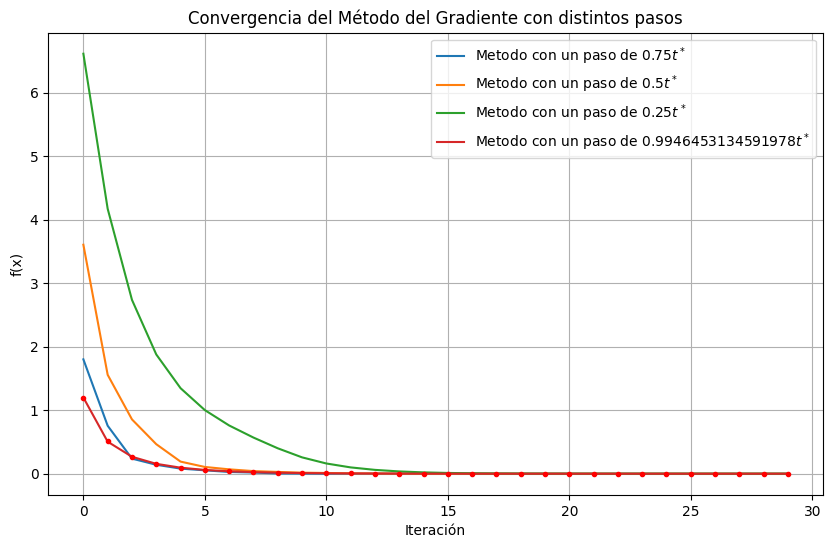

In [5]:
alphas=[3/4,1/2,1/4,np.random.rand()]
x0=np.random.rand(10)
plt.figure(figsize=(10,6))
for alpha in alphas:
    autovalores=np.linspace(1,10,10)
    A=np.diag(autovalores)
    y_optimo=metodo_gradiente_paso_optimo(A,x0,max_iter=30)
    y_no_optimo=metodo_gradiente_no_optimo(A,x0,alpha=alpha,max_iter=30)
    plt.plot(y_no_optimo,label=f"Metodo con un paso de {alpha}$t^*$")
plt.plot(y_optimo,".",color="red")
plt.xlabel("Iteración")
plt.ylabel("f(x)")
plt.legend()
plt.title("Convergencia del Método del Gradiente con distintos pasos")
plt.grid()
plt.show()


Ejercicio 2.
1. Para funciones cuadráticas $f(x) = \frac{1}{2}x^TAx$ con matrices $A \in \mathbb{R}^{n×n}$ definidas positivas y diagonales, elaborar una serie de tests para corroborar la terminación en tantos pasos como autovalores distintos de A del Gradiente Conjugado.

2. Sea $t^*_k$ la longitud del paso óptimo en la k-ésima iteración y sea $β_k$ el coeficiente de corrección, experimentar qué sucede si en vez de utilizar ($t^*_k$, $β_k$) se utiliza:
- $(0.9t^*_k, β_k)$
- $(0.99t^*_k, β_k)$
- $(t^*_k, 0.9β_k)$
- $(t^*_k, 0.99β_k)$
- $(0.9t^*_k, 0.9β_k)$
- $(0.99t^*_k, 0.99β_k)$

Comentar cómo el desempeño de Gradientes Conjugados depende de la exactitud de la búsqueda lineal.

3. Comparar el desempeño de Gradiente Conjugado con el Método del Gradiente para funciones cuadráticas con matrices muy mal condicionadas (es decir, que $\frac{λ_{máx}}{λ_{min}}$ sea muy grande).

Vamos a elaborar tests con las siguientes matrices.

In [6]:
A1 = np.diag(np.random.randint(1, 30, 100))

A2 = np.diag(np.random.randint(1, 10, 20))

A3 = np.array([[1, 0], [0, 0.8]])

A4 = np.array([[1, 0, 0, 0, 0],
               [0, 8, 0, 0 ,0],
               [0, 0, 3, 0, 0],
               [0, 0, 0, 4, 0],
               [0, 0, 0, 0, 17]])

A5 = np.array([[163,   0,   0,   0,   0,   0],
               [  0, 163,   0,   0,   0,   0],
               [  0,   0, 181,   0,   0,   0],
               [  0,   0,   0,   1,   0,   0],
               [  0,   0,   0,   0,   1,   0],
               [  0,   0,   0,   0,   0,   1]])

Calculamos los autovalores de las matrices, y escribimos el Método del Gradiente Conjugado.

In [7]:
def gradiente_conjugado(A, b, x0, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
  return x_k, k

Evaluamos este método con las matrices dadas.

In [8]:
k = 1
for A in [A1, A2, A3, A4, A5]:
  n = A[0].shape
  b = np.zeros(n)
  x0 = np.ones(n)
  cant_autovalores = len(np.unique(np.linalg.eigvals(A)))
  min, iter = gradiente_conjugado(A, b, x0)
  print(f"A_{k} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  k += 1


A_1 realiza 27 iteraciones, teniendo 27 autovalores.
A_2 realiza 9 iteraciones, teniendo 9 autovalores.
A_3 realiza 2 iteraciones, teniendo 2 autovalores.
A_4 realiza 5 iteraciones, teniendo 5 autovalores.
A_5 realiza 3 iteraciones, teniendo 3 autovalores.


Corroboramos que efectivamente el método termina en tantos pasos como autovalores distintos tiene cada matriz.

Experimentamos qué sucede si en vez de usar ( $t^*_k$ ,  $β_k$ ) utilizamos las perturbaciones dadas.

Lo analizamos con A1, ya que es la matriz más grande.


Realiza 50 iteraciones, teniendo 27 autovalores.


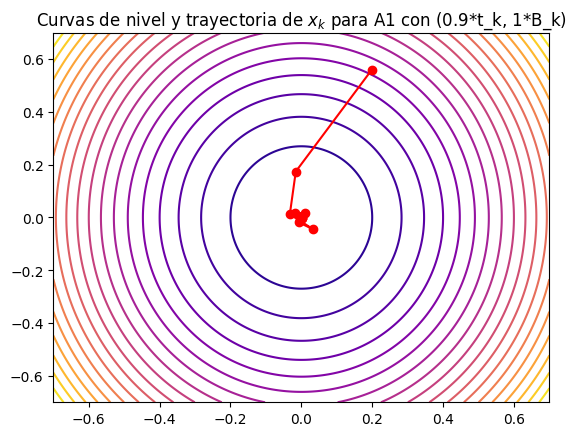


Realiza 50 iteraciones, teniendo 27 autovalores.


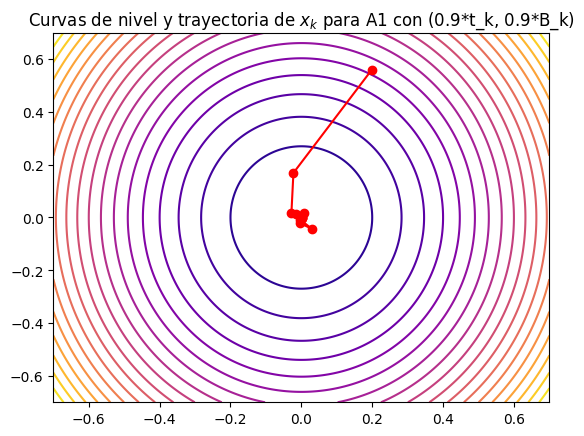


Realiza 50 iteraciones, teniendo 27 autovalores.


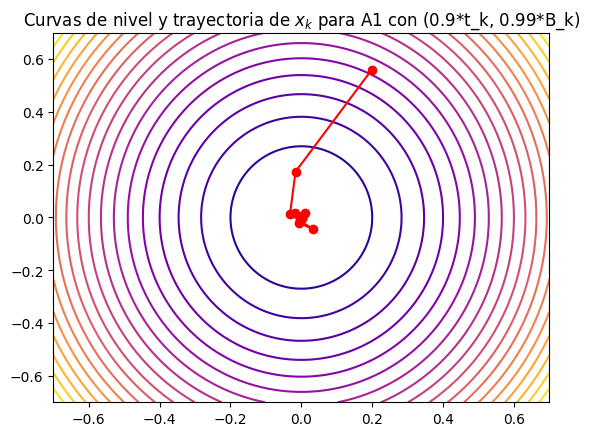


Realiza 40 iteraciones, teniendo 27 autovalores.


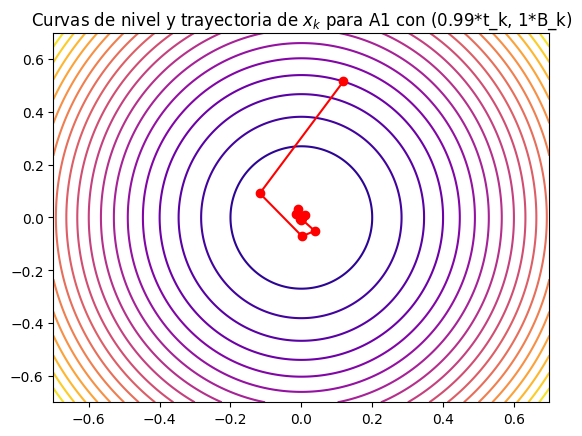


Realiza 48 iteraciones, teniendo 27 autovalores.


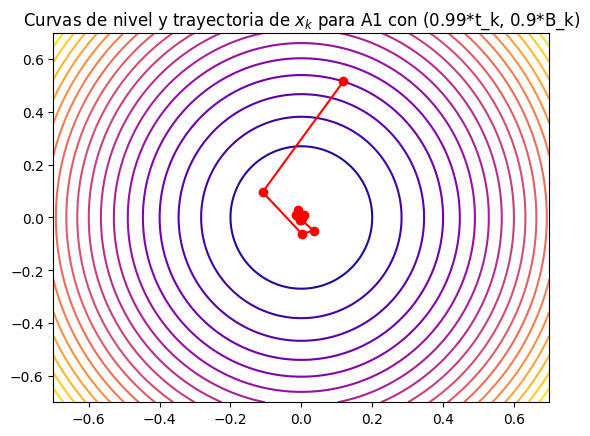


Realiza 40 iteraciones, teniendo 27 autovalores.


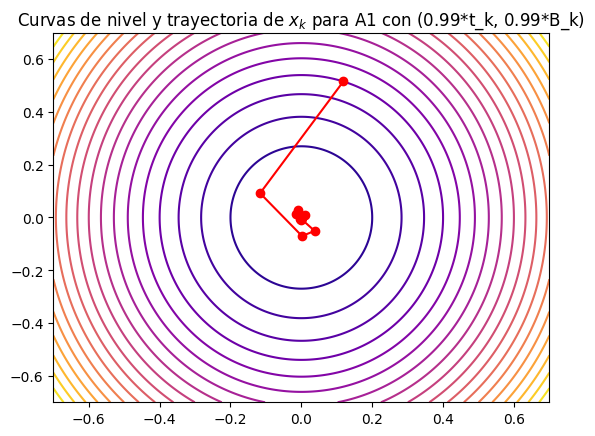


Realiza 46 iteraciones, teniendo 27 autovalores.


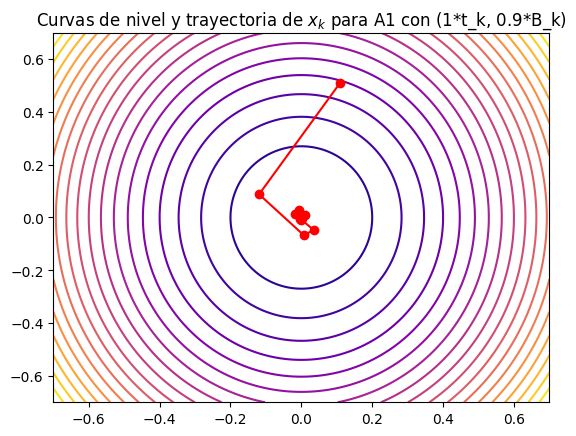


Realiza 37 iteraciones, teniendo 27 autovalores.


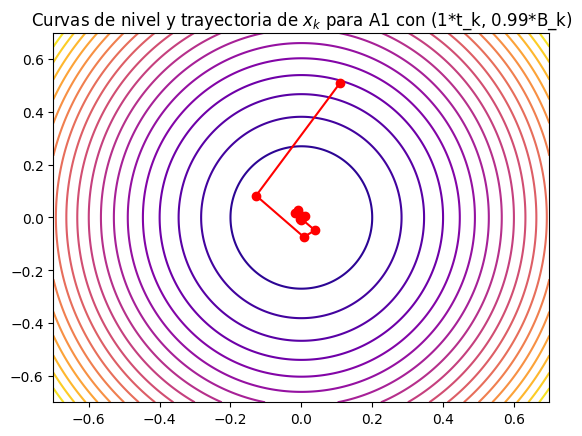

In [9]:
def gradiente_conjugado_modif(A, b, x0, delta=1, gamma=1, eps=1e-8, k_max=1000):
  k = 0
  x_k = np.array(x0)
  d_k = -(A @ x0 + b)
  puntos_xk = []
  while np.linalg.norm(A @ x_k + b) > eps and k < k_max:
    t_k = - delta * (d_k.T @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    x_k = x_k + t_k * d_k
    beta_k = gamma * (d_k.T @ A @ (A @ x_k + b)) / (d_k.T @ (A @ d_k))
    d_k = -(A @ x_k + b) + beta_k * d_k
    k += 1
    puntos_xk.append(x_k)
  return x_k, k, puntos_xk


def funcion_objetivo(x, A):
  X, Y = x
  return 0.5 * (A[0, 0] * X**2 + A[1, 1] * Y**2)


import matplotlib.pyplot as plt

%matplotlib inline

def curvas_nivel(A, delta, gamma, limites, puntos_xk, levels=20):
    """
    Función que grafica curvas de nivel.
    f : es la función a graficar (tiene que ir de R2 en R)
    limites: es una lista o tupla de números: [a,b,c,d]. Va a graficar la función en el cuadrado [a,b] x [c,d]
    levels : cantidad de curvas de nivel a graficar
    """
    plt.figure()
    x = np.linspace(limites[0], limites[1], 1000)
    y = np.linspace(limites[2], limites[3], 1000)
    X, Y = np.meshgrid(x, y)
    Z = funcion_objetivo((X, Y), A)

    plt.contour(X,Y,Z, cmap='plasma', levels=levels)
    puntos_xk = np.array(puntos_xk)
    plt.plot(puntos_xk[:, 0], puntos_xk[:, 1], 'o-', color='red', label='Trayectoria $x_k$')
    plt.title(f'Curvas de nivel y trayectoria de $x_k$ para A1 con ({delta}*t_k, {gamma}*B_k)')
    plt.show()


n = A1[0].shape
b_1 = np.zeros(n)
x0_1 = np.ones(n)
cant_autovalores_A1 = len(np.unique(np.linalg.eigvals(A1)))
for delta in [0.9, 0.99, 1]:
  for gamma in [1, 0.9, 0.99]:
    if delta == 1 and gamma == 1: #este caso es sin modificación, lo omitimos
      continue
    min_modif, iter_modif, puntos_xk = gradiente_conjugado_modif(A1, b_1, x0_1, delta, gamma)
    print(f"\nRealiza {iter_modif} iteraciones, teniendo {cant_autovalores_A1} autovalores.")
    if puntos_xk[0][0] < 0.2 and puntos_xk[0][1] < 0.2:
      curvas_nivel(A1, delta, gamma, (-0.2, 0.2, -0.2, 0.2), puntos_xk)
    elif puntos_xk[0][0] < 0.5 and puntos_xk[0][1] < 0.5:
      curvas_nivel(A1, delta, gamma, (-0.5, 0.5, -0.5, 0.5), puntos_xk)
    elif puntos_xk[0][0] < 0.7 and puntos_xk[0][1] < 0.7:
      curvas_nivel(A1, delta, gamma, (-0.7, 0.7, -0.7, 0.7), puntos_xk)
    else:
      curvas_nivel(A1, delta, gamma, (-1, 1, -1, 1), puntos_xk)


Observamos que al aplicar perturbaciones en los parámetros del Método del Gradiente Conjugado, el desempeño del método empeora en comparación con el uso de los valores óptimos del paso $t_k*$ y el factor de corrección $β_k$. Estas perturbaciones modifican ligeramente la longitud del paso en dirección al mínimo, alejándose del valor óptimo.

Por lo tanto, al alterar este paso se reduce la eficiencia del método, ya que éste necesita una mayor cantidad de iteraciones para alcanzar una solución cercana al mínimo, haciendo de este modo que la convergencia sea más lenta.

Ahora analizaremos qué sucede con el Gradiente Conjugado y el Método del Gradiente para matrices muy mal condicionadas.

Comenzamos analizando el Gradiente Conjugado.

In [10]:
B1 = np.diag(np.random.randint(1, 10000, 100))

B2 = np.diag(np.random.randint(1, 1000000, 100))


print(f"Con Gradiente Conjugado:")
i = 1
for B in [B1, B2]:
  n = B[0].shape
  b = np.zeros(n)
  x0 = np.ones(n)
  cant_autovalores = len(np.unique(np.linalg.eigvals(B)))
  min, iter = gradiente_conjugado(B, b, x0)
  print(f"B_{i} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  i += 1


Con Gradiente Conjugado:
B_1 realiza 69 iteraciones, teniendo 99 autovalores.
B_2 realiza 90 iteraciones, teniendo 100 autovalores.


Ahora veamos qué sucede con el Método del Gradiente.

In [11]:
def metodo_gradiente(A, b, x0, max_iter=1000):
    k = 0
    x_k = x0
    d = -A @ x0 - b
    while  k <= max_iter and np.linalg.norm(d) > 10**(-8):
        t = d.T @ d / (d.T @ A @ d)
        x_k = x_k + t*d
        d = -A @ x_k - b
        k = k+1
    return x_k, k


print(f"Con Método del Gradiente:")
j = 1
for B in [B1, B2]:
  n = B[0].shape
  b = np.zeros(n)
  x0 = np.ones(n)
  cant_autovalores_B = len(np.unique(np.linalg.eigvals(B)))
  min, iter = metodo_gradiente(B, b, x0)
  print(f"B_{j} realiza {iter} iteraciones, teniendo {cant_autovalores} autovalores.")
  j += 1


Con Método del Gradiente:
B_1 realiza 1001 iteraciones, teniendo 100 autovalores.
B_2 realiza 1001 iteraciones, teniendo 100 autovalores.


Comprobamos que para funciones cuadráticas con matrices muy mal condicionadas, el método del Gradiente Conjugado tiene un desempeño muchísimo mejor que el Método del Gradiente.

Esto queda reflejado en que el Gradiente Conjugado encuentra el óptimo en menor cantidad de iteraciones que cantidad de autovalores de la matriz. En cambio, esto no ocurre en el Método del Gradiente, ya que se realizan muchas más iteraciones que cantidad de autovalores.

##Ejercicio 4

1. Comparar el desempeño (en cantidad de iteraciones) del Método del Gradiente y sus variantes del Ejercicio
1 Item 1 con el Método de Barzilai-Borwein-Raydan. Se pueden utilizar los tests del Ejercicio 1 Item 1.

Definimos el método de búsqueda unidireccional de Wolfe ya que nos será útil al momento de utilizar el método de BBR.

In [12]:
def wolfe(A, x, d, c1 = 0.5, c2 = 0.75):
  alfa = 0
  t = 1
  beta = np.inf
  while True:
    if f(x+t*d,A) > f(x,A) + c1*t*np.dot((A@x).T,d):
      beta = t
      t = 1/2 * (alfa + beta)
    elif np.dot((A@(x+t*d)).T,d) < c2*np.dot((A@x).T,d):
      alfa = t
      if beta == np.inf:
        t = 2*alfa
      else:
        t = 1/2 * (alfa + beta)
    else:
      break
  return t

Utilizando la función de Wolfe que definimos previamente para obtener el paso inicial, definimos una función que minimiza nuestra función cuadrática mediante el Método de Barzilai-Borwein-Raydan (BRR):

In [13]:
def metodo_bbr(A, x0, max_iter=30, tol=1e-8):
  d0 = -A @ x0
  t0 = wolfe(A, x0, d0)
  x_k = x0 + t0 * d0
  k = 1
  x_k_prev = x0
  f_vals = [f(x_k, A)]
  while np.linalg.norm(A @ x_k) > tol and k < max_iter:
    d_k = -A @ x_k
    s_k_prev = x_k - x_k_prev
    t_k = np.dot(s_k_prev, s_k_prev) / np.dot(s_k_prev, A @ s_k_prev)
    x_k_prev = x_k.copy()
    x_k = x_k + t_k * d_k
    f_vals.append(f(x_k, A))
    k += 1
  return x_k, f_vals, k

Comparamos con el método gradiente:

In [14]:
def metodo_gradiente_modif(A, x0, alpha, max_iter=1000, tol=1e-8):
    k = 0
    x_k = x0
    d = -A @ x0
    while(k < max_iter and np.linalg.norm(d) > tol):
        t = alpha*(np.dot(d.T,d)/np.dot(d.T, A @ d))
        x_k = x_k + t*d
        d = -A@x_k
        k += 1
    return x_k, k

In [19]:
alphas=[3/4, 1/2, 1/4, round(np.random.rand(), 2)]
x0 = np.random.rand(10)

for alpha in alphas:
  autovalores = np.linspace(1, 10, 10)
  A = np.diag(autovalores)
  x_k_grad, k_grad = metodo_gradiente_modif(A, x0, alpha = alpha, max_iter = 1000)
  x_k_bbr, _, k_bbr = metodo_bbr(A, x0, max_iter=50)
  print(f"Para alpha = {alpha}:")
  print(f"El método del gradiente realiza {k_grad} iteraciones.")
  print(f"El método de BBR realiza {k_bbr} iteraciones.")
  print()



Para alpha = 0.75:
El método del gradiente realiza 46 iteraciones.
El método de BBR realiza 35 iteraciones.

Para alpha = 0.5:
El método del gradiente realiza 65 iteraciones.
El método de BBR realiza 35 iteraciones.

Para alpha = 0.25:
El método del gradiente realiza 92 iteraciones.
El método de BBR realiza 35 iteraciones.

Para alpha = 0.01:
El método del gradiente realiza 1000 iteraciones.
El método de BBR realiza 35 iteraciones.



2. Sea $\{x_k\}_k$ la secuencia generada por BBR, realizar experimentos que permitan mostrar que la secuencia
$\{f(x_k)\}_k$ no es necesariamente monótona decreciente. Para mostrar esto, realizar un gráfico de k contra
$f(x_k)$.

Obtenemos la lista con los $f(x_k)$ y la cantidad de iteraciones que necesitó el método y graficamos:

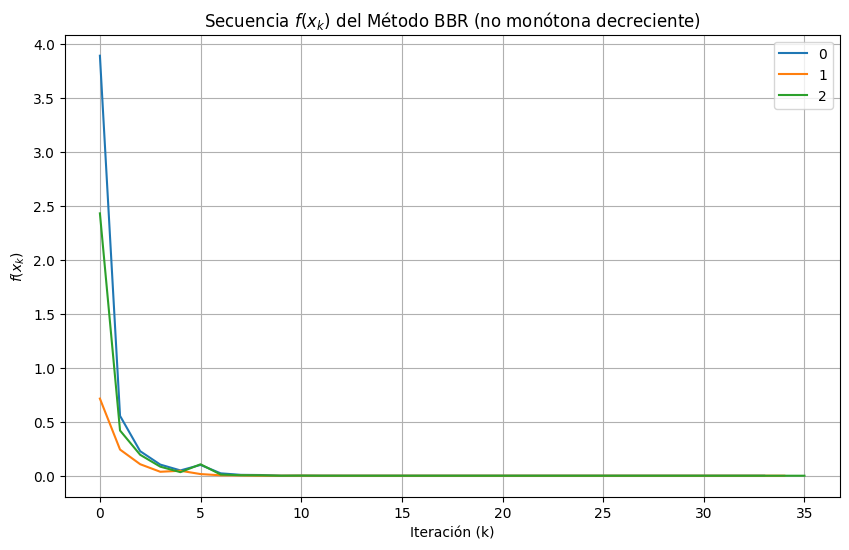

In [16]:
plt.figure(figsize=(10, 6))
for i in range(3):
  x0 = np.random.rand(10)
  autovalores = np.linspace(1, 10, 10)
  A = np.diag(autovalores)
  _, fs, ktop = metodo_bbr(A, x0, max_iter=50)
  ks = np.arange(ktop)
  plt.plot(ks, np.array(fs), label=f"{i}")
plt.xlabel("Iteración (k)")
plt.ylabel(r'$f(x_k)$')
plt.title(r'Secuencia $f(x_k)$ del Método BBR (no monótona decreciente)')
plt.grid()
plt.legend()
plt.show()

Graficamos el valor de la función a lo largo de la secuencia para distintos $x_0$ iniciales y vemos que no es necesariamente monótona decreciente.